# Patrón de Diseño Strategy

Bienvenido/a. En esta lección aprenderás el patrón de diseño Strategy, fundamental para la flexibilidad y extensibilidad en el diseño de software.

## Objetivos
- Comprender qué es el patrón Strategy y cuándo aplicarlo.
- Implementar el patrón Strategy en Python.
- Relacionar el patrón con ejemplos de la vida real.

---

**Ejemplo de la vida real:** Piensa en una aplicación de transporte (como Google Maps): puedes elegir entre diferentes estrategias de ruta (en auto, bicicleta, caminando) y el algoritmo de cálculo cambia, pero la interfaz para el usuario es la misma.

# Patrón de Diseño Strategy

## Introducción

El patrón de diseño Strategy es un patrón de comportamiento que permite definir una familia de algoritmos, encapsular cada uno de ellos y hacerlos intercambiables. Este patrón permite que el algoritmo varíe independientemente de los clientes que lo utilizan.

## Explicación Detallada

### Definición

- **Strategy**: Define una familia de algoritmos, encapsula cada uno de ellos y los hace intercambiables. Debido a que los algoritmos deben recibir los mismos parámetros y devolver el mismo tipo de resultado, se pueden intercambiar sin que el cliente se dé cuenta.

### Beneficios del Patrón Strategy

1. **Flexibilidad**: Permite cambiar los algoritmos en tiempo de ejecución.

2. **Mantenibilidad**: Facilita la adición de nuevos algoritmos sin modificar el código existente.

3. **Reusabilidad**: Promueve la reutilización de algoritmos en diferentes contextos.

## Ejemplos Explicados

### Ejemplo Antes de Aplicar el Patrón Strategy

Supongamos que tenemos una clase `Route` que calcula la mejor ruta, el costo y el tiempo de viaje dependiendo del tipo de vehículo. Aquí está el código antes de aplicar el patrón Strategy:

In [1]:
class Route:
    def __init__(self, origin: int, destination: int) -> None:
        self.origin: int = origin
        self.destination: int = destination

    def get_best_route(self, vehicle: str) -> dict:
        if vehicle == "car":
            return {"start_street": self.origin, "end_street": self.destination, "route": "Use the avenue 123"}
        elif vehicle == "bike":
            return {"start_street": self.origin, "end_street": self.destination, "route": "Use the bike lane"}
        return {}

    def get_cost(self, vehicle: str) -> float:
        if vehicle == "car":
            return round((self.destination - self.origin) * 0.1, 2)
        elif vehicle == "bike":
            return 0
        return 0

    def get_time(self, vehicle: str) -> float:
        if vehicle == "car":
            return round((self.destination - self.origin) * 0.5, 2)
        elif vehicle == "bike":
            return round((self.destination - self.origin) * 2, 2)
        return 0

    def avg_speed(self, vehicle: str) -> float:
        return round((self.destination - self.origin) / self.get_time(vehicle), 2)

#### Análisis del Ejemplo Incorrecto

- Tiene múltiples responsabilidades y debe ser modificada cada vez que se agrega un nuevo tipo de vehículo.

- Viola el principio de `Single Responsibility`, ya que, tiene más de una razón para cambiar.

- Viola el principio de `Open/Closed`, ya que, no se puede extender sin modificar el código existente.

- Viola el principio de `Liskov Substitution`, ya que, no se puede reemplazar un tipo de vehículo por otro sin cambiar el comportamiento de la clase.

- Viola el principio de `Interface Segregation`, ya que, los métodos `calculate_best_route`, `calculate_cost` y `calculate_time` no son relevantes para todos los tipos de vehículos.

- Viola el principio de `Dependency Inversion`, ya que, depende de las implementaciones concretas de los tipos de vehículos.

- Hace que el código sea difícil de mantener y extender.

### Ejemplo Después de Aplicar el Patrón Strategy

Aplicando el patrón Strategy, podemos refactorizar el código de la siguiente manera:

In [2]:
from abc import ABC, abstractmethod

class RouteStrategy(ABC):
    @abstractmethod
    def get_best_route(self, origin: int, destination: int) -> dict:
        pass

    @abstractmethod
    def get_cost(self, origin: int, destination: int) -> float:
        pass

    @abstractmethod
    def get_time(self, origin: int, destination: int) -> float:
        pass

In [3]:
class CarStrategy(RouteStrategy):
    def get_best_route(self, origin: int, destination: int) -> dict:
        return {"start_street": origin, "end_street": destination, "route": "Use the avenue 123"}

    def get_cost(self, origin: int, destination: int) -> float:
        return round((destination - origin) * 0.1, 2)

    def get_time(self, origin: int, destination: int) -> float:
        return round((destination - origin) * 0.5, 2)

class BikeStrategy(RouteStrategy):
    def get_best_route(self, origin: int, destination: int) -> dict:
        return {"start_street": origin, "end_street": destination, "route": "Use the bike lane"}

    def get_cost(self, origin: int, destination: int) -> float:
        return 0

    def get_time(self, origin: int, destination: int) -> float:
        return round((destination - origin) * 2, 2)

In [4]:
class Route:
    def __init__(self, origin: int, destination: int, strategy: RouteStrategy) -> None:
        self.origin: int = origin
        self.destination: int = destination
        self.strategy: RouteStrategy = strategy

    def get_best_route(self) -> dict:
        return self.strategy.get_best_route(origin=self.origin, destination=self.destination)

    def get_cost(self) -> float:
        return self.strategy.get_cost(origin=self.origin, destination=self.destination)

    def get_time(self) -> float:
        return self.strategy.get_time(origin=self.origin, destination=self.destination)

    def avg_speed(self) -> float:
        return round((self.destination - self.origin) / self.get_time(), 2)

In [5]:
# Ejemplo de uso
car_strategy = CarStrategy()
bike_strategy = BikeStrategy()

route_by_car = Route(origin=0, destination=10, strategy=car_strategy)
route_by_bike = Route(origin=0, destination=10, strategy=bike_strategy)

print("With car the route is:", route_by_car.get_best_route())
print("With car the cost is:", route_by_car.get_cost())
print("With car the time is:", route_by_car.get_time())
print("With car the average speed is:", route_by_car.avg_speed())

print("With bike the route is:", route_by_bike.get_best_route())
print("With bike the cost is:", route_by_bike.get_cost())
print("With bike the time is:", route_by_bike.get_time())
print("With bike the average speed is:", route_by_bike.avg_speed())

With car the route is: {'start_street': 0, 'end_street': 10, 'route': 'Use the avenue 123'}
With car the cost is: 1.0
With car the time is: 5.0
With car the average speed is: 2.0
With bike the route is: {'start_street': 0, 'end_street': 10, 'route': 'Use the bike lane'}
With bike the cost is: 0
With bike the time is: 20
With bike the average speed is: 0.5


## Ejercicios prácticos y preguntas de reflexión

1. Implementa una nueva estrategia para rutas en transporte público y agrégala al ejemplo.
2. ¿En qué otros contextos de la vida real podrías aplicar el patrón Strategy?
3. ¿Por qué es útil separar el algoritmo de la lógica del cliente?

### Autoevaluación
- ¿Qué ventajas aporta el patrón Strategy al desarrollo de software?
- ¿Puedes dar un ejemplo de Strategy fuera del contexto de rutas?

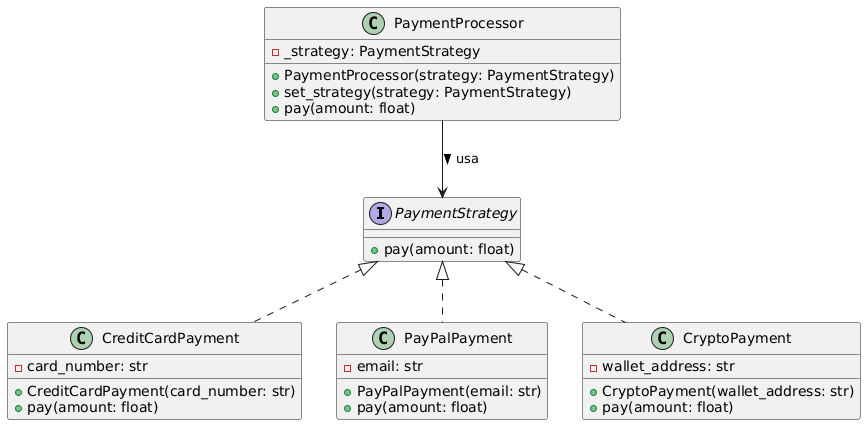

In [1]:
from abc import ABC, abstractmethod

# Interfaz Strategy
class PaymentStrategy(ABC):
    @abstractmethod
    def pay(self, amount: float):
        pass

# Estrategia concreta: pago con tarjeta
class CreditCardPayment(PaymentStrategy):
    def __init__(self, card_number: str):
        self.card_number = card_number

    def pay(self, amount: float):
        print(f"Pagando ${amount:.2f} con tarjeta de crédito {self.card_number}")

# Estrategia concreta: pago con PayPal
class PayPalPayment(PaymentStrategy):
    def __init__(self, email: str):
        self.email = email

    def pay(self, amount: float):
        print(f"Pagando ${amount:.2f} usando PayPal con email {self.email}")

# Estrategia concreta: pago con criptomoneda
class CryptoPayment(PaymentStrategy):
    def __init__(self, wallet_address: str):
        self.wallet_address = wallet_address

    def pay(self, amount: float):
        print(f"Pagando ${amount:.2f} con criptomoneda a la wallet {self.wallet_address}")

# Contexto que usa la estrategia
class PaymentProcessor:
    def __init__(self, strategy: PaymentStrategy):
        self._strategy = strategy

    def set_strategy(self, strategy: PaymentStrategy):
        self._strategy = strategy

    def pay(self, amount: float):
        self._strategy.pay(amount)

# Uso
if __name__ == "__main__":
    processor = PaymentProcessor(CreditCardPayment("1234-5678-9876-5432"))
    processor.pay(100.00)

    processor.set_strategy(PayPalPayment("usuario@correo.com"))
    processor.pay(200.00)

    processor.set_strategy(CryptoPayment("1A2b3C4d5E6f7G8h9I0j"))
    processor.pay(300.00)


Pagando $100.00 con tarjeta de crédito 1234-5678-9876-5432
Pagando $200.00 usando PayPal con email usuario@correo.com
Pagando $300.00 con criptomoneda a la wallet 1A2b3C4d5E6f7G8h9I0j


## Conclusión

1. **Desacoplamiento**: El patrón Strategy promueve el desacoplamiento entre el contexto y los algoritmos.

2. **Flexibilidad**: Permite cambiar los algoritmos en tiempo de ejecución.

3. **Mantenibilidad**: Facilita la adición de nuevos algoritmos sin modificar el código existente.

4. **Reusabilidad**: Promueve la reutilización de algoritmos en diferentes contextos.

Aplicar el patrón Strategy puede requerir la creación de múltiples clases e interfaces, pero los beneficios en términos de flexibilidad y mantenibilidad del software son significativos.


## Referencias y recursos
- [Patrón Strategy en Python - Refactoring Guru](https://refactoring.guru/es/design-patterns/strategy/python/example)
- [Patrones de diseño en Python - W3Schools](https://www.w3schools.com/python/python_design_patterns.asp)
- [Documentación oficial de Python: clases y objetos](https://docs.python.org/es/3/tutorial/classes.html)
- [Visualizador de objetos Python Tutor](https://pythontutor.com/)